In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

viinit=pd.read_excel('http://taanila.fi/wine.xlsx')

viinit.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
viinit.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13'],
      dtype='object')

In [3]:
viinit.columns=['Wine', 'Alcohol', 'Malic acid ', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                'Proline']
viinit.head()

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Muutettiin kolumnien nimet vähän kuvaavimmiksi datan lähteen tietojen mukaan.

Koska tässä datassa on liikaa eri tekijöitä, niin karsitaan muutamat pois, jotta datasta saadaan käyttökelpoisempaa tähän käyttötarkoitukseen:

In [4]:
viinit_drop = viinit.drop(["Ash", 'Alcalinity of ash', 'Total phenols', 'Nonflavanoid phenols', 'Proanthocyanins', 'OD280/OD315 of diluted wines',"Hue", "Proline"], axis=1)
viinit_drop.head()

,Wine,Alcohol,Malic acid,Magnesium,Flavanoids,Color intensity
0,1,14.23,1.71,127,3.06,5.64
1,1,13.20,1.78,100,2.76,4.38
2,1,13.16,2.36,101,3.24,5.68
3,1,14.37,1.95,113,3.49,7.80
4,1,13.24,2.59,118,2.69,4.32


Varmistetaan että jokaisessa kohdassa on tieto:

In [5]:
viinit_drop.count()

Wine               178
Alcohol            178
Malic acid         178
Magnesium          178
Flavanoids         178
Color intensity    178
dtype: int64

Seuraavaksi voisi havainnollistaa viinin (Wine) riippuvuutta ominaisuuksista:

/Users/taavitihkan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/taavitihkan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/taavitihkan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/taavitihkan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, d

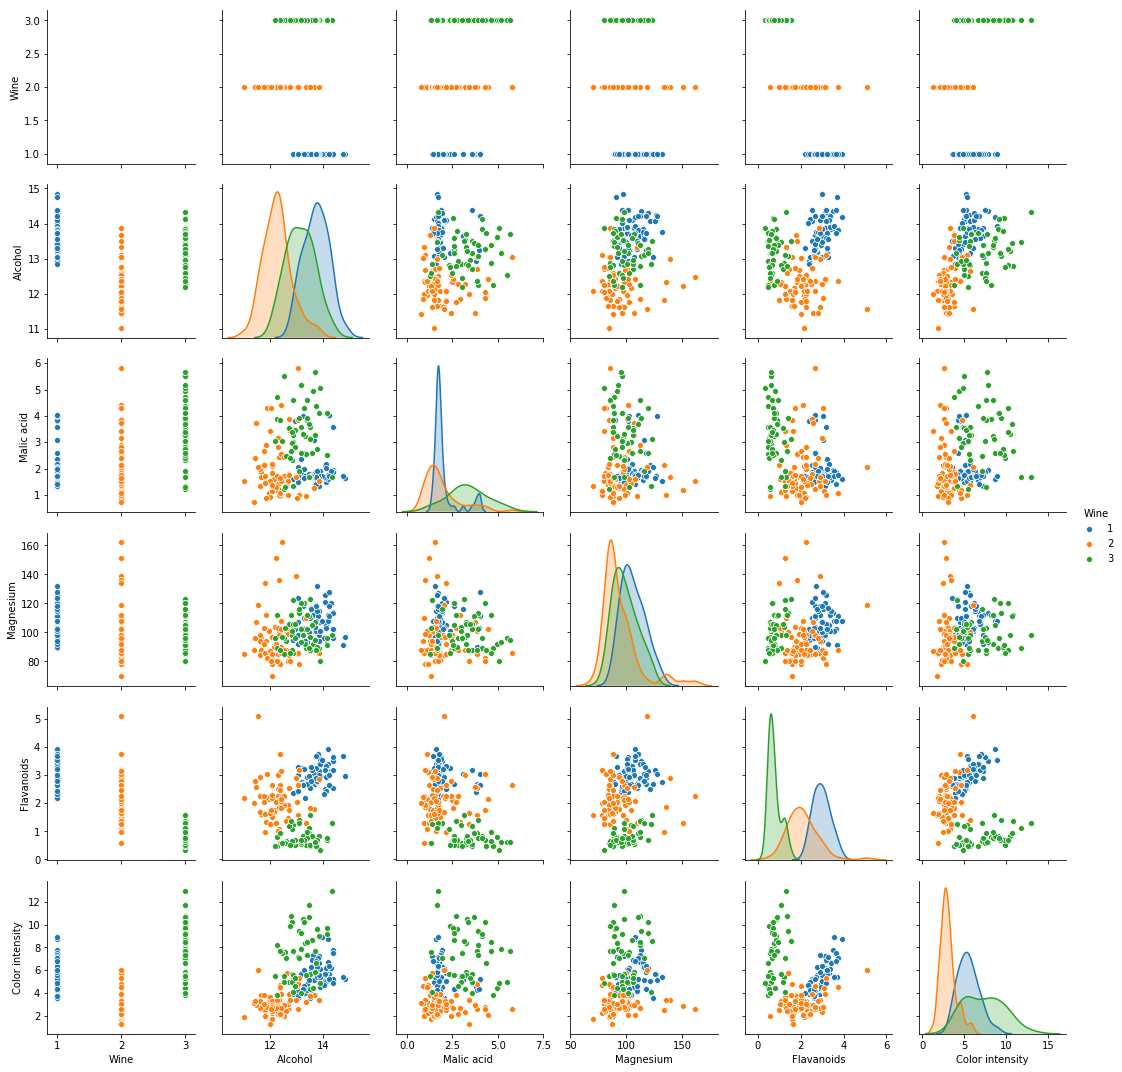

In [6]:
sns.pairplot(viinit_drop, hue="Wine")

Jaetaan data opetus- ja testidataan, sitten testataan oikeaan osuneiden ennusteiden osuus:

In [7]:
X = viinit_drop.drop("Wine", axis=1)

y = viinit_drop["Wine"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=5)

In [8]:
from sklearn import tree

malli_viinit = tree.DecisionTreeClassifier(max_depth=5)
malli_viinit.fit(X_train, y_train)

y_train_malli = malli_viinit.predict(X_train)
y_test_malli = malli_viinit.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_train_malli))

1.0


In [10]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_malli))

[[40  0  0]
 [ 0 57  0]
 [ 0  0 36]]


In [11]:
print(accuracy_score(y_test, y_test_malli))

0.8888888888888888


In [12]:
print(confusion_matrix(y_test, y_test_malli))

[[16  3  0]
 [ 1 12  1]
 [ 0  0 12]]


Sitten muodostetaan puu, jossa viinit jakautuvat kolmeen luokkaan seuraavasti:

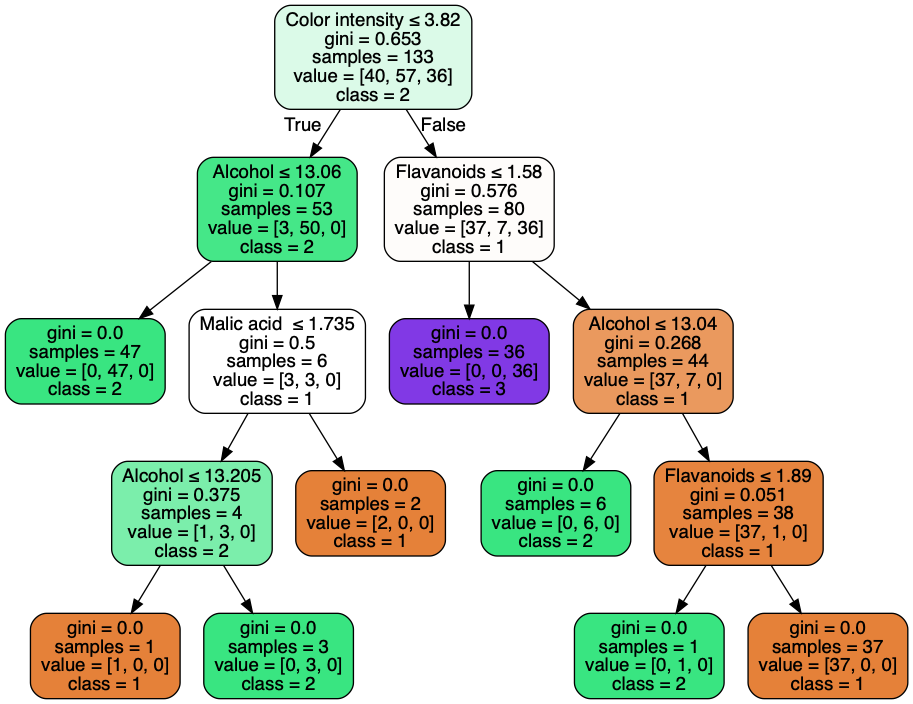

In [13]:
import pydotplus 
from IPython.display import Image  

dot_data = tree.export_graphviz(malli_viinit, out_file=None, 
                         feature_names=X.columns,
                         class_names=['1', '2', '3'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())